<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assignment" data-toc-modified-id="Assignment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Assignment</a></span></li><li><span><a href="#Prep" data-toc-modified-id="Prep-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prep</a></span></li><li><span><a href="#Get-the-data" data-toc-modified-id="Get-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get the data</a></span></li><li><span><a href="#Use-the-lists-to-create-a-graph" data-toc-modified-id="Use-the-lists-to-create-a-graph-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Use the lists to create a graph</a></span></li><li><span><a href="#Graph-Analysis-Metrics" data-toc-modified-id="Graph-Analysis-Metrics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Graph Analysis Metrics</a></span></li><li><span><a href="#Create-a-csv-file-for-Gephi" data-toc-modified-id="Create-a-csv-file-for-Gephi-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Create a csv file for Gephi</a></span></li></ul></div>

### Assignment

In [67]:
# The following video describes our work on this assignment

from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="KJW_Wk2_Assign1_DS620.mp4" type="video/mp4">
</video></div>""")

Graph databases are a type of NoSQL database, created to address the limitations of relational databases. While the graph model explicitly lays out the dependencies between nodes of data, the relational model and other NoSQL database models link the data by implicit connections. Graph databases, by design, allow simple and fast retrieval of complex hierarchical structures that are difficult to model.

In this assignment.. 
Load a graph database of your choosing from a text file or other source. If you take a
large network dataset from the web (such as from https://snap.stanford.edu/data/), please
feel free at this point to load just a small subset of the nodes and edges.

Create basic analysis on the graph, including the graph’s diameter, and at least one other
metric of your choosing.

Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.

### Preparation - Load required libraries

In [51]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
import pandas as pd
import nxviz

import warnings
warnings.filterwarnings('ignore')

### Get the data

The Stanford collection of network graph databases includes one of roads in Pennylvania.  This dataset will be used for this assignement (link to Pennsylvania Roads dataset: https://snap.stanford.edu/data/roadNet-PA.html)

In [52]:
# The path to the data file on the local computer is used below for file loading. 
# Please download the file from Github and modify the path below if required.

%cd C:\Jagdish\MastersPrograms\CUNY\DS620 Web Analytics\Week2

C:\Jagdish\MastersPrograms\CUNY\DS620 Web Analytics\Week2


In [53]:
#load each column in the input file as a list of integers
infile = 'roadNet-PA.txt'

linecount = 0
col1_list = []
col2_list = []

with open(infile,'r') as fileref:
    lines = fileref.readlines()
    for line in lines:
        linecount += 1
        if linecount > 4:
            col1, col2 = line.split()
            col1_list.append(int(col1))
            col2_list.append(int(col2))
            

### Use the lists to create a graph

In [54]:
# Given that the original file has more than a million rows, we select a smaller set of nodes to utilize for this assignment
small_col1_list = col1_list[:100]
small_col2_list = col2_list[:100]

In [55]:
# Load the data from the lists to a graph
g1 = nx.Graph()

# Add nodes
g1.add_nodes_from(small_col1_list)
g1.add_nodes_from(small_col2_list)
connect_all_list = [(13,0), (13,11)]

# Add edges
edges_list = list(zip(small_col1_list, small_col2_list))
g1.add_edges_from(edges_list)
g1.add_edges_from(connect_all_list)

# list(g1.nodes(data=True))[0:5]
# list(g1.edges(data=True))[0:5]

### Graph Analysis Metrics

In [56]:
# Calculate diameter using direct networkx function as well as a derived function
print(f'Using NetworkX function, the diameter is {nx.diameter(g1)}')

#Calculate the diameter by finding the maximum eccentricity value
excentricity_dict = nx.eccentricity(g1)

max_excentricity = 0
for v in excentricity_dict:
    if excentricity_dict[v] > max_excentricity:
        max_excentricity = excentricity_dict[v]

print(f'Max eccentricity, which equates to the diameter, is {max_excentricity}')  

Using NetworkX function, the diameter is 13
Max eccentricity, which equates to the diameter, is 13


In [57]:
# Derive additional Metrics
print(f'Number of nodes {g1.number_of_nodes()}')
print(f'Number of edges {g1.number_of_edges()}')
print(f'Center is {nx.center(g1)}')
print(f'Periphery is {nx.periphery(g1)}')
print(f'Radius is {nx.radius(g1)}')

# Print top 5 nodes with the highest number of edges
print('Top five intersection with the most connections')
(pd.Series({n: len(list(g1.neighbors(n))) 
            for n in g1.nodes()})
 .sort_values(ascending=False)
 .head(5)
)


Number of nodes 60
Number of edges 67
Center is [5, 9, 15]
Periphery is [3861, 3872, 389, 4005, 58, 69, 76, 197]
Radius is 7
Top five intersection with the most connections


6      5
0      4
309    4
22     4
20     4
dtype: int64

In [58]:
# Create a dict to be used for color coding nodes based on associated number of edges
node_edges={n: len(list(g1.neighbors(n))) for n in g1.nodes()}


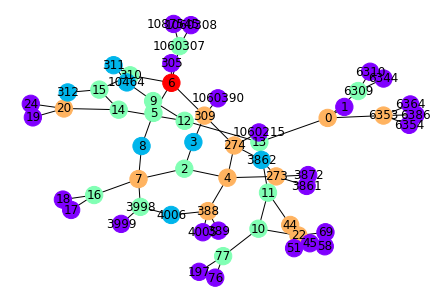

In [59]:
# Graph of nodes and intersections
color_map=[color for color in node_edges.values()]
cNorm  = colors.Normalize(vmin=0, vmax=max(node_edges.values()))
nx.draw(g1, with_labels=True, node_color=color_map, norm=cNorm, cmap = plt.cm.get_cmap('rainbow'))
plt.show()

As can be seen from the graph above, node 6 has a five way intersection, which is a road planning issue, as these intersections usually result in an increased amount of incidents.
This is the kind of analysis that graph visualization of networks makes easily possible.

### Create a csv file for Gephi

The code below creates a csv file, which is then read into Gephi (a graph database package).  Gephi is then used to create a visualization of the graph.  Note that NetworkX could also be used to create the graph, but for this assignment a graph database is to be used.

In [60]:
#Load the two lists to a dataframe
#indata = pd.DataFrame(columns=['node1', 'node2']
indata = pd.DataFrame()

indata['node1'] = small_col1_list
indata['node2'] = small_col2_list

indata.head(2)

,node1,node2
0,0,1
1,0,6309


In [61]:
# Export to csv so that Gephi can read in the data
indata.to_csv('roadNet-PA-subset.csv', index=False)

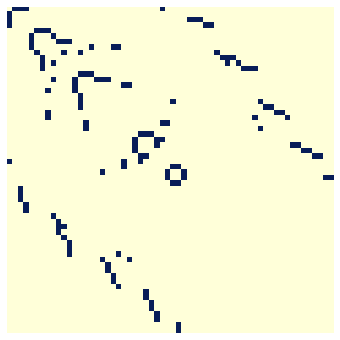

In [62]:
# Create an adjacency matrix 
from nxviz import MatrixPlot

m = MatrixPlot(g1)
m.draw()
plt.show()
#bi-directional (for the most part), symetric along the diagonal, 
#Makes sense - roads are using bi-directional, west <-> East, North <-> South

In [ ]:
# The symmetry of the matrix plot above denotes the bi-directionality of the roads.
# The few instances of asymmetry likely pertain to uni-directional roads.

### Gephi Visualization below

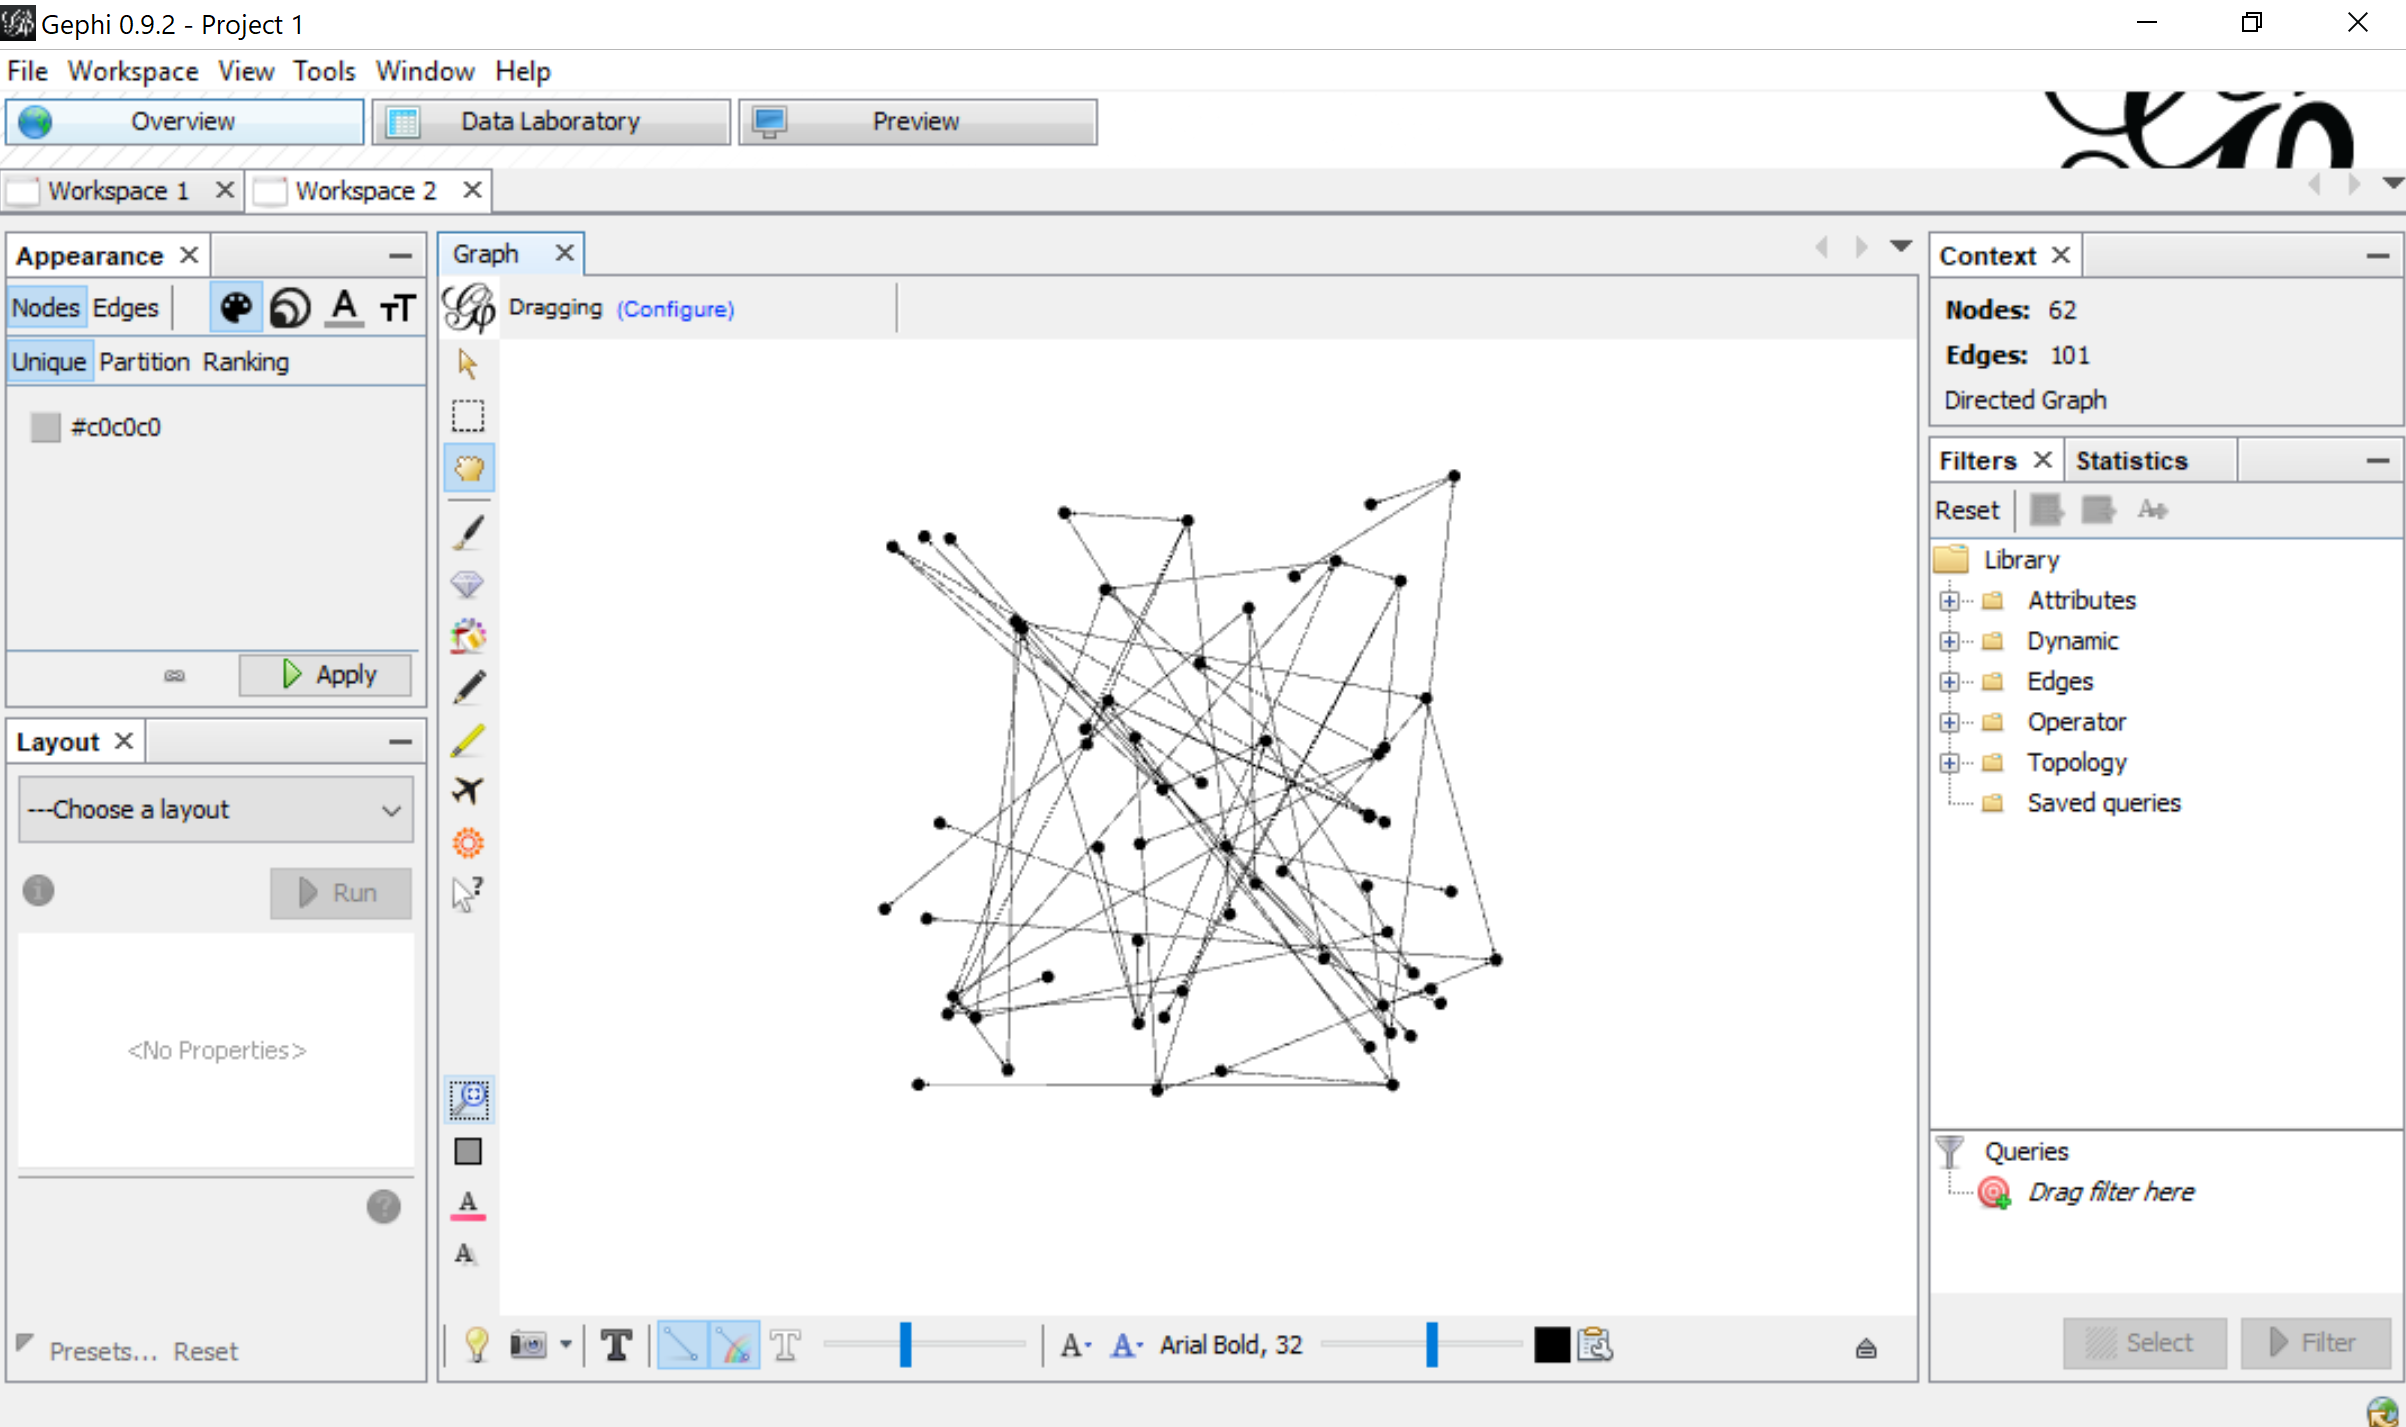
